<h1 align="center"> OUASS TAOUFIK </h1>

<h2 align="center"> Segmentation des clients à l'aide de  l'algorithme K-means clustering  en Python. </h2>


Dans le monde concurrentiel d'aujourd'hui, il est crucial de comprendre le comportement des clients et de les catégoriser en fonction de leur démographie et de leur comportement d'achat. Il s'agit d'un aspect essentiel de la segmentation de la clientèle qui permet aux spécialistes du marketing de mieux adapter leurs efforts à divers sous-ensembles d'audience en termes de stratégies de promotion, de marketing et de développement de produits.


Mesures à prendre pour résoudre ce problème :
1. Importation de bibliothèques.
2. Exploration des données.
3. Visualisation des données.
4. Clustering à l'aide de K-Means.

**<font size="4">1. Importation de bibliothèques.</font>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

**<font size="4">2. Exploration des données.</font>**

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.shape

(200, 5)

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**<font size="4">3.  Visualisation des données.</font>**

In [12]:
ages = data[['Age']].describe()
ages

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


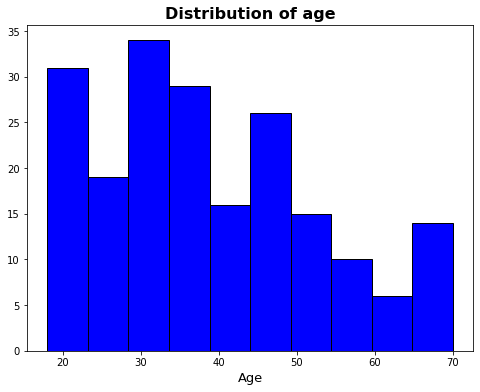

In [31]:
plt.figure(figsize=(8,6))
plt.title('Distribution of age', fontsize = 16, fontweight='bold')
plt.hist(data['Age'], color = 'blue', edgecolor = 'black')
plt.xlabel('Age', fontsize = 13)
plt.savefig('Distribution of Age.png', bbox_inches = 'tight')
plt.grid(False)

In [14]:
income = data[['Annual Income (k$)']].describe()
income

,Annual Income (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


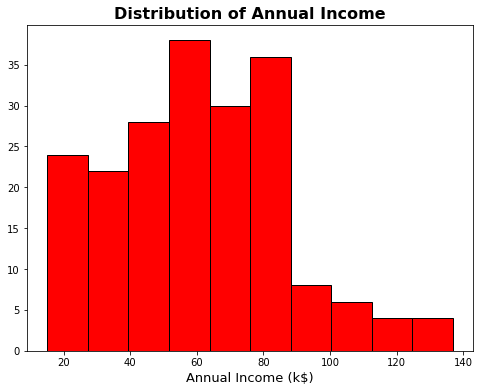

In [32]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Annual Income', fontsize = 16, fontweight='bold')
plt.hist(data['Annual Income (k$)'], color = 'red', edgecolor = 'black')
plt.xlabel('Annual Income (k$)', fontsize = 13)
plt.savefig('Distribution of Annual Income.png', bbox_inches = 'tight')
plt.grid(False)

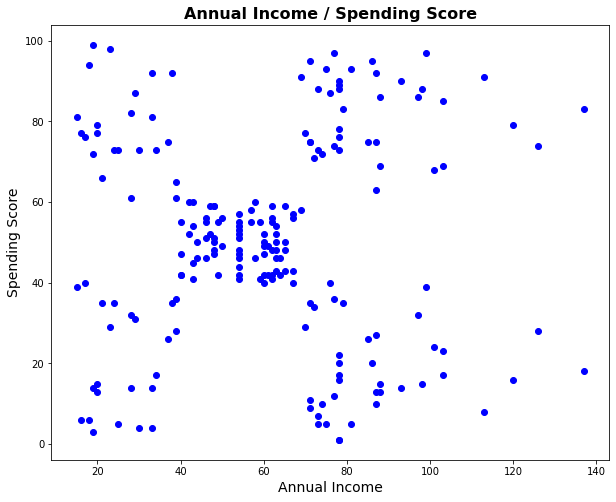

In [40]:
plt.figure(figsize=(10,8))
plt.title('Annual Income / Spending Score', fontsize = 16, fontweight='bold')  
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color = 'blue', edgecolors = 'blue')
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Spending Score', fontsize = 14)
plt.savefig('Annual Income vs Spending Score.png', bbox_inches = 'tight')
plt.show()

Text(0, 0.5, 'Spending Score')

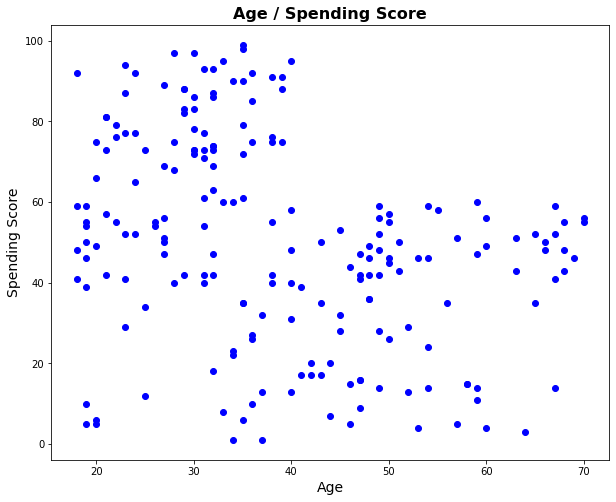

In [39]:
plt.figure(figsize=(10,8))
plt.title('Age / Spending Score', fontsize = 16, fontweight='bold')  
plt.scatter(data['Age'], data['Spending Score (1-100)'], color = 'blue', edgecolors = 'blue')
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Spending Score', fontsize = 14)

**<font size="4">4. Clustering à l'aide de K-Means.</font>**

Le clustering consiste à regrouper un ensemble d'objets de telle sorte que les éléments d'un même cluster soient plus similaires les uns aux autres que les éléments d'autres clusters. La similarité est une métrique qui reflète la force de la relation entre deux éléments de données.

L'algorithme K-Means, est un algorithme d'apprentissage non supervisé qui regroupe les données. Cet algorithme nécessite que le nombre de clusters soit spécifié.

**<font size="3">Segmentation en fonction du revenu annuel et du score de dépenses</font>**

Dans ce cas, il est facile de visualiser le nombre de clusters que nous devrions choisir (k = 5), mais ce n'est pas toujours le cas, surtout lorsque nous travaillons avec un ensemble de données de plus grande dimension qui ne peut être visualisé.


C:\Users\ToufikOass\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


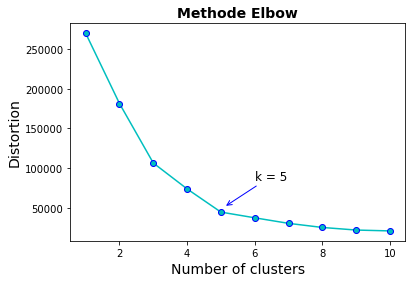

In [41]:
# calculate distortion for a range of number of cluster
X = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.title('Methode Elbow', fontsize = 14, fontweight='bold')
plt.plot(range(1, 11), distortions, 'c', marker='o', markeredgecolor = 'b')
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Distortion', fontsize = 14)
plt.annotate('k = 5', xy=(5.1, 51000), xytext=(6, 85000),fontsize = 12, arrowprops={'arrowstyle': '->', 'color': 'blue'})
plt.savefig('Elbow Method.png', bbox_inches = 'tight')
plt.show()

Maintenant, nous exécutons l'algorithme K-means avec 5 clusters

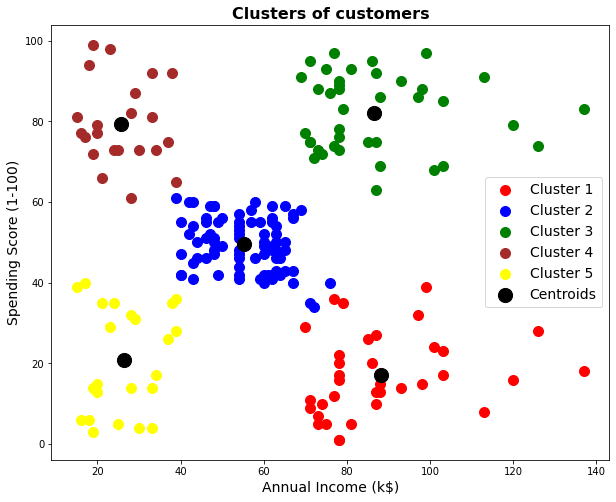

In [43]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', edgecolors = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', edgecolors = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', edgecolors = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'brown', edgecolors = 'brown', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'yellow', edgecolors = 'yellow', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of customers', fontsize = 16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize = 14)
plt.ylabel('Spending Score (1-100)', fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('Clusters of customers.png', bbox_inches = 'tight')
plt.show()